#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

**Θεωρητικό Υπόβαθρο**

|      | AlexNet | VGG | LeNet
|-----------------|-----------------|-----------------|-----------------|
| Επίπεδα    | 8   | 16    | 7   |
| Μέγεθος Φίλτρων    | 11x11x3, 5x5x3, 3x3x3    | 3x3x3    | 5x5x3   |
| Συνάρτηση Ενεργοποίησης | ReLU    | ReLU   | Sigmoid   |
| Πλήθος Παραμέτρων | 60M    | 138M    | 60K    |
| Τεχνικές Pooling | max-pooling of size 3x3 strides 2  | max-pooling of size 2x2 strides 2     | average-pooling of size 2x2 strides 2    |
| Dropout | Ναι, droprate=0.5   | Όχι   | Όχι   |

**LeNet**: Αν και το LeNet ήταν μια πρωτοποριακή αρχιτεκτονική για την εποχή της, σήμερα θεωρείται απλή και περιορισμένη σε σχέση με τα πιο σύγχρονα δίκτυα. Συνήθως χρησιμοποιείται σε απλές εργασίες αναγνώρισης προτύπων. Έχει όμως σημαντικά λιγότερες παραμέτρους από τα υπόλοιπα μοντέλα και για αυτό είναι πιο εύκολο να εκπαιδευτεί

**AlexNe**t: Το AlexNet εισήγαγε τη βαθιά μάθηση σε μεγάλη κλίμακα και καθόρισε νέες προσεγγίσεις για την κατηγοριοποίηση εικόνων. Η χρήση του ReLU σαν συνάρτηση ενεργοποίησης, η χρήση dropout για τη μείωση του overfitting, και η χρήση μεγαλύτερων μεγεθών φίλτρων σε σύγκριση με το LeNet συνέβαλλαν στην επίτευξη καλύτερης απόδοσης.

**VGG16**: Το VGG16 είναι γνωστό για την απλή του αρχιτεκτονική, με μικρά 3x3 φίλτρα και βαθιά στοίβαση των συνελικτικών επιπέδων. Αν και έχει πολλές παραμέτρους, αυτό το δίκτυο είναι εξαιρετικά αποτελεσματικό σε προβλήματα αναγνώρισης εικόνας, εάν υπάρχουν αρκετά δεδομένα εκπαίδευσης και χρησιμοποιηθούν κατάλληλα μέτρα αποτελεσματικότητας.

Συνολικά, η επιλογή του κατάλληλου μοντέλου εξαρτάται από την εφαρμογή και τα διαθέσιμα δεδομένα εκπαίδευσης. Τα πιο σύγχρονα μοντέλα όπως το AlexNet και το VGG16 συνήθως προτιμώνται για πιο προηγμένες εφαρμογές όπου απαιτείται μεγαλύτερη ακρίβεια και απόδοση.

Επίσης με την χρήση της ReLU στα δύο πιο σύγχρονα μοντέλα αντιμετωπίζεται και το πρόβλημα του vanishing gradient

Επίσης στο VGG για την αντιμετώπιση του overfitting χρησιμοποιείται batch normalization και όχι dropout που χρησιμοποιείται στο AlexNet

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 85

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"
num_classes = 20

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' beetle', ' bowl', ' caterpillar', ' clock', ' cloud', ' forest', ' lizard', ' man', ' maple_tree', ' orchid', ' otter', ' sea', ' seal', ' shrew', ' skunk', ' skyscraper', ' television', ' trout', ' wardrobe', ' whale']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


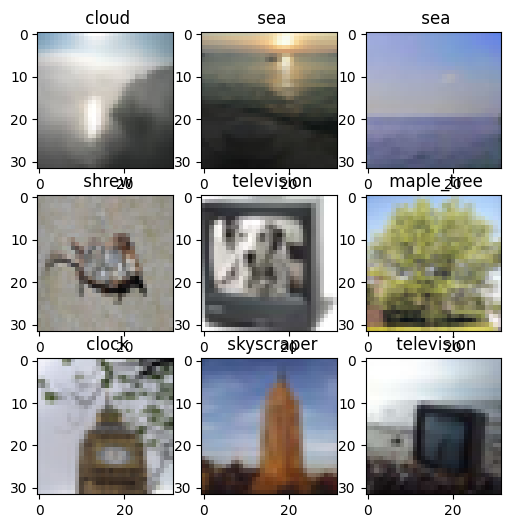

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
import numpy as np

def encode_labels(labels):
  """Encodes labels using a dictionary mapping for efficient representation.

  Args:
      labels: A 1D NumPy array of labels.

  Returns:
      A 1D NumPy array of encoded labels (integers).
      A dictionary mapping unique labels to their corresponding integer codes.
  """

  # Create a set to efficiently store unique labels
  unique_labels = set(labels)

  # Create a dictionary to map unique labels to integer codes
  label_to_code = {label: i for i, label in enumerate(unique_labels)}

  # Encode labels using the dictionary
  encoded_labels = np.vectorize(label_to_code.get)(labels)

  # Reshape encoded labels to a column vector
  encoded_labels = encoded_labels.reshape(-1, 1)

  return encoded_labels, label_to_code

# Example usage
y_train_encoded, label_to_code = encode_labels(y_train.reshape(1, -1)[0])
y_test_encoded, _ = encode_labels(y_test.reshape(1, -1)[0])  # Reuse label_to_code
y_val_encoded, _ = encode_labels(y_val.reshape(1, -1)[0])  # Reuse label_to_code

# Optional post-processing (if needed)
y_train = y_train_encoded
y_test = y_test_encoded
y_val = y_val_encoded


## Ερώτημα 1
---
### Βήμα 1: Σχεδίαση και εκπαίδευση των μοντέλων

 Σχεδίαστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας τον ίδιο αλγορίθμο βελτιστοποίησης ([optimizer](https://keras.io/api/optimizers/)), την ίδια συνάρτηση κόστους [loss function](https://keras.io/api/losses/), το ίδιο μέγεθος παρτίδας (batch size) και 50 εποχές (epochs) `*`.

 Για την εκτίμηση της απόδοσης των μοντέλων να χρησιμοποιήσετε ως μετρική ([metrics](https://keras.io/api/metrics/)) την F1-score.


`*`
 Μπορείτε να πειραματιστείτε με τον optimizer, την loss function και το batch size για τα 4 μοντέλα πριν καταλήξετε στην τελική σας κοινή, για όλα τα μοντέλα επιλογή.


---
  
### Βήμα 2: Αξιολόγηση των μοντέλων

α. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε στο Βήμα 1, απεικονίστε σε κοινό διάγραμμα τα F1-scores εκπαίδευσης και επικύρωσης στο σύνολο των εποχών.

β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων.
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
---

### Βήμα 3: Αξιολόγηση F1-score
Αξιολογήστε τα F1-scores, χρησιμοποιώντας το σύνολο ελέγχου σας (test set).

---

In [ ]:
import tensorflow as tf

def f1_score_metric(y_true, y_pred):
    y_pred_labels = tf.argmax(y_pred, axis=1)
    y_true = tf.cast(y_true, tf.int64)
    y_pred_labels = tf.cast(y_pred_labels, tf.int64)

    # Calculate confusion matrix
    cm = tf.math.confusion_matrix(y_true, y_pred_labels)

    # Calculate precision and recall
    precision = tf.math.divide_no_nan(cm[1, 1], tf.reduce_sum(cm[:, 1]))
    recall = tf.math.divide_no_nan(cm[1, 1], tf.reduce_sum(cm[1, :]))

    # Calculate F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + 1e-10))

    return f1_score

**Βήμα 1**

**Lenet**

In [ ]:
LeNet_adam = models.Sequential()
LeNet_adam.add(layers.Conv2D(32, (5, 5), activation='sigmoid', input_shape=(32, 32, 3)))
LeNet_adam.add(layers.AveragePooling2D((2, 2)))
LeNet_adam.add(layers.Conv2D(32, (5, 5), activation='sigmoid'))
LeNet_adam.add(layers.AveragePooling2D((2, 2)))
LeNet_adam.add(layers.Flatten())
LeNet_adam.add(layers.Dense(120, activation='sigmoid'))
LeNet_adam.add(layers.Dense(84, activation='sigmoid'))
LeNet_adam.add(layers.Dense(20, activation='softmax'))
LeNet_adam.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric], run_eagerly=True)
LeNet_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 average_pooling2d (Average  (None, 14, 14, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 32)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 120)               9

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "/My Drive/CNNs/LeNet_adam.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_lenet_adam = LeNet_adam.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])


Epoch 1/10
67/67 [==============================] - 65s 960ms/step - loss: 2.6566 - f1_score_metric: 0.1384 - val_loss: 2.6297 - val_f1_score_metric: 0.1688
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 71s 1s/step - loss: 2.5670 - f1_score_metric: 0.1632 - val_loss: 2.5530 - val_f1_score_metric: 0.1770
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 71s 1s/step - loss: 2.5023 - f1_score_metric: 0.1983 - val_loss: 2.5035 - val_f1_score_metric: 0.2346
Epoch 4/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 69s 1s/step - loss: 2.4386 - f1_score_metric: 0.2224 - val_loss: 2.4590 - val_f1_score_metric: 0.2304
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 872ms/step - loss: 2.3972 - f1_score_metric: 0.2297 - val_loss: 2.4007 - val_f1_score_metric: 0.2459
Epoch 6/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 868ms/step - loss: 2.3526 - f1_score_metric: 0.2429 - val_loss: 2.3682 - val_f1_score_metric: 0.2467
Epoch 7/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 59s 890ms/step - loss: 2.3174 - f1_score_metric: 0.2556 - val_loss: 2.3441 - val_f1_score_metric: 0.2587
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 56s 838ms/step - loss: 2.2762 - f1_score_metric: 0.2721 - val_loss: 2.3105 - val_f1_score_metric: 0.2601
Epoch 9/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 62s 924ms/step - loss: 2.2334 - f1_score_metric: 0.2811 - val_loss: 2.2591 - val_f1_score_metric: 0.2627
Epoch 10/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 59s 887ms/step - loss: 2.2040 - f1_score_metric: 0.2902 - val_loss: 2.2302 - val_f1_score_metric: 0.2928


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

LeNet_adam.save('/content/drive/My Drive/CNNs/LeNet_adam.h5')

In [ ]:
LeNet_sgd = models.Sequential()
LeNet_sgd.add(layers.Conv2D(32, (5, 5), activation='sigmoid', input_shape=(32, 32, 3)))
LeNet_sgd.add(layers.AveragePooling2D((2, 2)))
LeNet_sgd.add(layers.Conv2D(32, (5, 5), activation='sigmoid'))
LeNet_sgd.add(layers.AveragePooling2D((2, 2)))
LeNet_sgd.add(layers.Flatten())
LeNet_sgd.add(layers.Dense(120, activation='sigmoid'))
LeNet_sgd.add(layers.Dense(84, activation='sigmoid'))
LeNet_sgd.add(layers.Dense(20, activation='softmax'))
LeNet_sgd.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric], run_eagerly=True)
LeNet_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 32)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "/My Drive/CNNs/LeNet_sgd.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_lenet_sgd = LeNet_sgd.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])


Epoch 1/10
67/67 [==============================] - 60s 882ms/step - loss: 3.1308 - f1_score_metric: 0.0054 - val_loss: 3.0476 - val_f1_score_metric: 0.0061
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 59s 879ms/step - loss: 3.0284 - f1_score_metric: 0.0050 - val_loss: 3.0107 - val_f1_score_metric: 0.0037
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 863ms/step - loss: 3.0043 - f1_score_metric: 0.0061 - val_loss: 3.0004 - val_f1_score_metric: 0.0051
Epoch 4/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 61s 920ms/step - loss: 2.9979 - f1_score_metric: 0.0058 - val_loss: 2.9984 - val_f1_score_metric: 0.0039
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 870ms/step - loss: 2.9966 - f1_score_metric: 0.0054 - val_loss: 2.9979 - val_f1_score_metric: 0.0034
Epoch 6/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 869ms/step - loss: 2.9965 - f1_score_metric: 0.0062 - val_loss: 2.9982 - val_f1_score_metric: 0.0064
Epoch 7/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 861ms/step - loss: 2.9965 - f1_score_metric: 0.0057 - val_loss: 2.9987 - val_f1_score_metric: 0.0034
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 59s 887ms/step - loss: 2.9965 - f1_score_metric: 0.0057 - val_loss: 2.9983 - val_f1_score_metric: 0.0034
Epoch 9/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 873ms/step - loss: 2.9966 - f1_score_metric: 0.0054 - val_loss: 2.9987 - val_f1_score_metric: 0.0034
Epoch 10/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 58s 866ms/step - loss: 2.9964 - f1_score_metric: 0.0064 - val_loss: 2.9983 - val_f1_score_metric: 0.0047


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

LeNet_sgd.save('/content/drive/My Drive/CNNs/LeNet_sgd.h5')

**AlexNet**

In [ ]:

AlexNet_adam = models.Sequential()
AlexNet_adam.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))

# Layer 1
AlexNet_adam.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu'))
AlexNet_adam.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
AlexNet_adam.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
AlexNet_adam.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
AlexNet_adam.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4
AlexNet_adam.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5
AlexNet_adam.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
AlexNet_adam.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output
AlexNet_adam.add(layers.Flatten())

# Dense layers
AlexNet_adam.add(layers.Dense(4096, activation='relu'))
AlexNet_adam.add(layers.Dropout(0.5))

AlexNet_adam.add(layers.Dense(4096, activation='relu'))
AlexNet_adam.add(layers.Dropout(0.5))

AlexNet_adam.add(layers.Dense(20, activation='softmax'))

# Compile the model
AlexNet_adam.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric], run_eagerly=True)

# Print model summary
AlexNet_adam.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 384)      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "/content/drive/My Drive/CNNs/AlexNet_adam.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_alexnet_adam = AlexNet_adam.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])


Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 3.0482 - f1_score_metric: 0.0135

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 75s 1s/step - loss: 3.0482 - f1_score_metric: 0.0135 - val_loss: 2.9689 - val_f1_score_metric: 0.0353
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 2.8442 - f1_score_metric: 0.0703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 72s 1s/step - loss: 2.8442 - f1_score_metric: 0.0703 - val_loss: 2.6721 - val_f1_score_metric: 0.1322
Epoch 3/10
67/67 [==============================] - ETA: 0s - loss: 2.4729 - f1_score_metric: 0.1883

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 111s 2s/step - loss: 2.4729 - f1_score_metric: 0.1883 - val_loss: 2.3205 - val_f1_score_metric: 0.2546
Epoch 4/10
67/67 [==============================] - ETA: 0s - loss: 2.2124 - f1_score_metric: 0.2973

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 93s 1s/step - loss: 2.2124 - f1_score_metric: 0.2973 - val_loss: 2.1635 - val_f1_score_metric: 0.3364
Epoch 5/10
67/67 [==============================] - ETA: 0s - loss: 2.0391 - f1_score_metric: 0.3467

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 106s 2s/step - loss: 2.0391 - f1_score_metric: 0.3467 - val_loss: 1.9631 - val_f1_score_metric: 0.4037
Epoch 6/10
67/67 [==============================] - ETA: 0s - loss: 1.8480 - f1_score_metric: 0.4202

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 81s 1s/step - loss: 1.8480 - f1_score_metric: 0.4202 - val_loss: 1.8268 - val_f1_score_metric: 0.4200
Epoch 7/10
67/67 [==============================] - ETA: 0s - loss: 1.6911 - f1_score_metric: 0.4611

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 80s 1s/step - loss: 1.6911 - f1_score_metric: 0.4611 - val_loss: 1.8555 - val_f1_score_metric: 0.4173
Epoch 8/10
67/67 [==============================] - ETA: 0s - loss: 1.5941 - f1_score_metric: 0.4895

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 77s 1s/step - loss: 1.5941 - f1_score_metric: 0.4895 - val_loss: 1.7533 - val_f1_score_metric: 0.4543
Epoch 9/10
67/67 [==============================] - ETA: 0s - loss: 1.4594 - f1_score_metric: 0.5239

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 75s 1s/step - loss: 1.4594 - f1_score_metric: 0.5239 - val_loss: 1.6940 - val_f1_score_metric: 0.4615
Epoch 10/10
67/67 [==============================] - ETA: 0s - loss: 1.3266 - f1_score_metric: 0.5764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 75s 1s/step - loss: 1.3266 - f1_score_metric: 0.5764 - val_loss: 1.6774 - val_f1_score_metric: 0.4811


In [ ]:
AlexNet_adam.save('/content/drive/My Drive/CNNs/AlexNet_adam.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

AlexNet_sgd = models.Sequential()
AlexNet_sgd.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))

# Layer 1
AlexNet_sgd.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu'))
AlexNet_sgd.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
AlexNet_sgd.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
AlexNet_sgd.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
AlexNet_sgd.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4
AlexNet_sgd.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5
AlexNet_sgd.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
AlexNet_sgd.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output
AlexNet_sgd.add(layers.Flatten())

# Dense layers
AlexNet_sgd.add(layers.Dense(4096, activation='relu'))
AlexNet_sgd.add(layers.Dropout(0.5))

AlexNet_sgd.add(layers.Dense(4096, activation='relu'))
AlexNet_sgd.add(layers.Dropout(0.5))

AlexNet_sgd.add(layers.Dense(20, activation='softmax'))

# Compile the model
AlexNet_sgd.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric], run_eagerly=True)

# Print model summary
AlexNet_sgd.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 384)      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "/content/drive/My Drive/CNNs/AlexNet_sgd.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_alexnet_sgd = AlexNet_sgd.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])


Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 2.9942 - f1_score_metric: 0.0478

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 92s 1s/step - loss: 2.9942 - f1_score_metric: 0.0478 - val_loss: 2.9926 - val_f1_score_metric: 0.0039
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 2.9908 - f1_score_metric: 0.0510

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 68s 1s/step - loss: 2.9908 - f1_score_metric: 0.0510 - val_loss: 2.9882 - val_f1_score_metric: 0.0105
Epoch 3/10
67/67 [==============================] - ETA: 0s - loss: 2.9833 - f1_score_metric: 0.0533

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 87s 1s/step - loss: 2.9833 - f1_score_metric: 0.0533 - val_loss: 2.9759 - val_f1_score_metric: 0.0382
Epoch 4/10
67/67 [==============================] - ETA: 0s - loss: 2.9613 - f1_score_metric: 0.0672

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 69s 1s/step - loss: 2.9613 - f1_score_metric: 0.0672 - val_loss: 2.9246 - val_f1_score_metric: 0.0306
Epoch 5/10
67/67 [==============================] - ETA: 0s - loss: 2.9028 - f1_score_metric: 0.0813

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 69s 1s/step - loss: 2.9028 - f1_score_metric: 0.0813 - val_loss: 2.8440 - val_f1_score_metric: 0.0743
Epoch 6/10
67/67 [==============================] - ETA: 0s - loss: 2.8536 - f1_score_metric: 0.0897

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 69s 1s/step - loss: 2.8536 - f1_score_metric: 0.0897 - val_loss: 2.8518 - val_f1_score_metric: 0.0741
Epoch 7/10
67/67 [==============================] - ETA: 0s - loss: 2.8035 - f1_score_metric: 0.1099

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 71s 1s/step - loss: 2.8035 - f1_score_metric: 0.1099 - val_loss: 2.7676 - val_f1_score_metric: 0.1082
Epoch 8/10
67/67 [==============================] - ETA: 0s - loss: 2.7431 - f1_score_metric: 0.1226

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 73s 1s/step - loss: 2.7431 - f1_score_metric: 0.1226 - val_loss: 2.6269 - val_f1_score_metric: 0.1463
Epoch 9/10
67/67 [==============================] - ETA: 0s - loss: 2.6862 - f1_score_metric: 0.1476

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 70s 1s/step - loss: 2.6862 - f1_score_metric: 0.1476 - val_loss: 2.6269 - val_f1_score_metric: 0.1335
Epoch 10/10
67/67 [==============================] - ETA: 0s - loss: 2.6422 - f1_score_metric: 0.1587

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 68s 1s/step - loss: 2.6422 - f1_score_metric: 0.1587 - val_loss: 2.6009 - val_f1_score_metric: 0.1658


In [ ]:
AlexNet_sgd.save('/content/drive/My Drive/CNNs/AlexNet_sgd.h5')

**VGG**

In [ ]:
from tensorflow.keras import models, layers

# Define the number of classes
classes_num = 20  # For example, if you have 10 classes

VGG_adam = models.Sequential()

#
# Block 1
VGG_adam.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu",input_shape=(32,32,3)))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 2
VGG_adam.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 3
VGG_adam.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 4
VGG_adam.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 5
VGG_adam.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_adam.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_adam.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Flatten the output
VGG_adam.add(layers.Flatten())

# Dense layers
VGG_adam.add(layers.Dense(units=4096, activation="relu"))
VGG_adam.add(layers.Dense(units=4096, activation="relu"))
VGG_adam.add(layers.Dense(units=classes_num, activation="softmax"))  # Use classes_num here

# Compile the model
VGG_adam.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric], run_eagerly=True)
VGG_adam.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [ ]:
# Set mixed precision policy
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "VGG_adam.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_vgg_adam = VGG_adam.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
VGG_adam.save('/content/drive/My Drive/CNNs/VGG_adam.h5')

Epoch 1/10


133/133 [==============================] - ETA: 0s - loss: 2.8590 - f1_score_metric: 0.1123

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 177s 1s/step - loss: 2.8590 - f1_score_metric: 0.1123 - val_loss: 2.4186 - val_f1_score_metric: 0.1880
Epoch 2/10
133/133 [==============================] - ETA: 0s - loss: 2.2226 - f1_score_metric: 0.2464

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 136s 1s/step - loss: 2.2226 - f1_score_metric: 0.2464 - val_loss: 2.1359 - val_f1_score_metric: 0.2909
Epoch 3/10
133/133 [==============================] - ETA: 0s - loss: 2.0469 - f1_score_metric: 0.3099

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 138s 1s/step - loss: 2.0469 - f1_score_metric: 0.3099 - val_loss: 2.0126 - val_f1_score_metric: 0.3531
Epoch 4/10
133/133 [==============================] - ETA: 0s - loss: 1.8786 - f1_score_metric: 0.3799

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 174s 1s/step - loss: 1.8786 - f1_score_metric: 0.3799 - val_loss: 1.8991 - val_f1_score_metric: 0.3600
Epoch 5/10
133/133 [==============================] - ETA: 0s - loss: 1.7259 - f1_score_metric: 0.4242

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 174s 1s/step - loss: 1.7259 - f1_score_metric: 0.4242 - val_loss: 1.7111 - val_f1_score_metric: 0.4349
Epoch 6/10
133/133 [==============================] - ETA: 0s - loss: 1.5655 - f1_score_metric: 0.4819

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 146s 1s/step - loss: 1.5655 - f1_score_metric: 0.4819 - val_loss: 1.5798 - val_f1_score_metric: 0.4760
Epoch 7/10
133/133 [==============================] - ETA: 0s - loss: 1.4650 - f1_score_metric: 0.5133

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 142s 1s/step - loss: 1.4650 - f1_score_metric: 0.5133 - val_loss: 1.7526 - val_f1_score_metric: 0.4512
Epoch 8/10
133/133 [==============================] - ETA: 0s - loss: 1.3724 - f1_score_metric: 0.5501

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 168s 1s/step - loss: 1.3724 - f1_score_metric: 0.5501 - val_loss: 1.4379 - val_f1_score_metric: 0.5448
Epoch 9/10
133/133 [==============================] - ETA: 0s - loss: 1.2304 - f1_score_metric: 0.6019

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 147s 1s/step - loss: 1.2304 - f1_score_metric: 0.6019 - val_loss: 1.5865 - val_f1_score_metric: 0.5377
Epoch 10/10
133/133 [==============================] - ETA: 0s - loss: 1.1429 - f1_score_metric: 0.6346

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 148s 1s/step - loss: 1.1429 - f1_score_metric: 0.6346 - val_loss: 1.4498 - val_f1_score_metric: 0.5781


In [ ]:
from tensorflow.keras import models, layers

# Define the number of classes
classes_num = 20  # For example, if you have 10 classes

VGG_sgd = models.Sequential()


# Block 1
VGG_sgd.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu",input_shape=(32,32,3)))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 2
VGG_sgd.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 3
VGG_sgd.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 4
VGG_sgd.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 5
VGG_sgd.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG_sgd.add(tf.keras.layers.BatchNormalization(momentum=0.8))
VGG_sgd.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Flatten the output
VGG_sgd.add(layers.Flatten())

# Dense layers
VGG_sgd.add(layers.Dense(units=4096, activation="relu"))
VGG_sgd.add(layers.Dense(units=4096, activation="relu"))
VGG_sgd.add(layers.Dense(units=classes_num, activation="softmax"))  # Use classes_num here

# Compile the model
VGG_sgd.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric])
VGG_sgd.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_78 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_94 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_79 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "VGG_sgd.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_vgg_sgd = VGG_sgd.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
VGG_sgd.save('/content/drive/My Drive/CNNs/VGG_sgd.h5')

Epoch 1/10
133/133 [==============================] - 12s 53ms/step - loss: 2.4369 - f1_score_metric: 0.0385 - val_loss: 2.1497 - val_f1_score_metric: 0.1104
Epoch 2/10
133/133 [==============================] - 5s 36ms/step - loss: 1.8392 - f1_score_metric: 0.1234 - val_loss: 2.1831 - val_f1_score_metric: 0.0208
Epoch 3/10
133/133 [==============================] - 4s 32ms/step - loss: 1.5286 - f1_score_metric: 0.2514 - val_loss: 1.7461 - val_f1_score_metric: 0.2432
Epoch 4/10
133/133 [==============================] - 6s 47ms/step - loss: 1.2245 - f1_score_metric: 0.3592 - val_loss: 1.6235 - val_f1_score_metric: 0.2472
Epoch 5/10
133/133 [==============================] - 4s 30ms/step - loss: 0.9658 - f1_score_metric: 0.5353 - val_loss: 1.5299 - val_f1_score_metric: 0.3939
Epoch 6/10
133/133 [==============================] - 5s 38ms/step - loss: 0.7095 - f1_score_metric: 0.6745 - val_loss: 1.6506 - val_f1_score_metric: 0.4097
Epoch 7/10
133/133 [==============================] - 5s 

**MyCNN**

In [ ]:
# Define the input shape
input_shape = (32, 32, 3)

# Define the model
myCNN_adam = models.Sequential()

# Convolutional layers
myCNN_adam.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
myCNN_adam.add(layers.MaxPooling2D((2, 2)))
myCNN_adam.add(layers.Conv2D(64, (3, 3), activation='relu'))
myCNN_adam.add(layers.MaxPooling2D((2, 2)))
myCNN_adam.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten layer
myCNN_adam.add(layers.Flatten())

# Dense layers
myCNN_adam.add(layers.Dense(512, activation='relu'))
myCNN_adam.add(layers.Dense(128, activation='relu'))

# Output layer
myCNN_adam.add(layers.Dense(20, activation='softmax'))  # Adjust num_classes according to your task

# Compile the model
myCNN_adam.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric])

# Print model summary
myCNN_adam.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_7 (Flatten)         (None, 2048)             

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "myCNN_adam.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_mycnn_adam = myCNN_adam.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
myCNN_adam.save('/content/drive/My Drive/CNNs/myCNN_adam.h5')

Epoch 1/10
67/67 [==============================] - 8s 25ms/step - loss: 2.6056 - f1_score_metric: 0.0242 - val_loss: 2.2971 - val_f1_score_metric: 0.0000e+00
Epoch 2/10
67/67 [==============================] - 1s 11ms/step - loss: 2.1031 - f1_score_metric: 0.0781 - val_loss: 2.0672 - val_f1_score_metric: 0.0000e+00
Epoch 3/10
67/67 [==============================] - 1s 10ms/step - loss: 1.8718 - f1_score_metric: 0.1003 - val_loss: 1.8141 - val_f1_score_metric: 0.0846
Epoch 4/10
67/67 [==============================] - 1s 11ms/step - loss: 1.6979 - f1_score_metric: 0.1630 - val_loss: 1.7041 - val_f1_score_metric: 0.2443
Epoch 5/10
67/67 [==============================] - 1s 12ms/step - loss: 1.5239 - f1_score_metric: 0.2570 - val_loss: 1.6173 - val_f1_score_metric: 0.1540
Epoch 6/10
67/67 [==============================] - 1s 11ms/step - loss: 1.4155 - f1_score_metric: 0.3139 - val_loss: 1.5888 - val_f1_score_metric: 0.1794
Epoch 7/10
67/67 [==============================] - 1s 10ms/st

In [ ]:
# Define the input shape
input_shape = (32, 32, 3)

# Define the model
myCNN_sgd = models.Sequential()

# Convolutional layers
myCNN_sgd.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
myCNN_sgd.add(layers.MaxPooling2D((2, 2)))
myCNN_sgd.add(layers.Conv2D(64, (3, 3), activation='relu'))
myCNN_sgd.add(layers.MaxPooling2D((2, 2)))
myCNN_sgd.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten layer
myCNN_sgd.add(layers.Flatten())

# Dense layers
myCNN_sgd.add(layers.Dense(512, activation='relu'))
myCNN_sgd.add(layers.Dense(128, activation='relu'))

# Output layer
myCNN_sgd.add(layers.Dense(20, activation='softmax'))  # Adjust num_classes according to your task

# Compile the model
myCNN_sgd.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric])

# Print model summary
myCNN_sgd.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_92 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 2048)            

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "myCNN_sgd.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_mycnn_sgd = myCNN_sgd.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
myCNN_sgd.save('/content/drive/My Drive/CNNs/myCNN_sgd.h5')

Epoch 1/10
67/67 [==============================] - 3s 16ms/step - loss: 2.9942 - f1_score_metric: 0.0000e+00 - val_loss: 2.9920 - val_f1_score_metric: 0.0000e+00
Epoch 2/10
12/67 [====>.........................] - ETA: 0s - loss: 2.9907 - f1_score_metric: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 1s 11ms/step - loss: 2.9877 - f1_score_metric: 0.0000e+00 - val_loss: 2.9865 - val_f1_score_metric: 0.0000e+00
Epoch 3/10
67/67 [==============================] - 1s 15ms/step - loss: 2.9810 - f1_score_metric: 0.0000e+00 - val_loss: 2.9793 - val_f1_score_metric: 0.0000e+00
Epoch 4/10
67/67 [==============================] - 1s 15ms/step - loss: 2.9709 - f1_score_metric: 0.0000e+00 - val_loss: 2.9700 - val_f1_score_metric: 0.0000e+00
Epoch 5/10
67/67 [==============================] - 1s 14ms/step - loss: 2.9552 - f1_score_metric: 0.0000e+00 - val_loss: 2.9483 - val_f1_score_metric: 0.0000e+00
Epoch 6/10
67/67 [==============================] - 1s 14ms/step - loss: 2.9264 - f1_score_metric: 0.0000e+00 - val_loss: 2.9102 - val_f1_score_metric: 0.0000e+00
Epoch 7/10
67/67 [==============================] - 1s 12ms/step - loss: 2.8664 - f1_score_metric: 0.0000e+00 - val_loss: 2.8377 - val_f1_score_metric: 0.0000e+00
Epoch 8/10
67/67 [===============

**Βήμα 2**

In [ ]:
def plot_f1(history):
  fig = plt.figure()
  plt.plot(history.history['f1_score_metric'], label='F1 Score')
  plt.plot(history.history['val_f1_score_metric'], label = 'val F1 score')
  plt.xlabel('Epoch')
  plt.ylabel('F1')
  plt.legend(loc='lower right')

**LeNet**

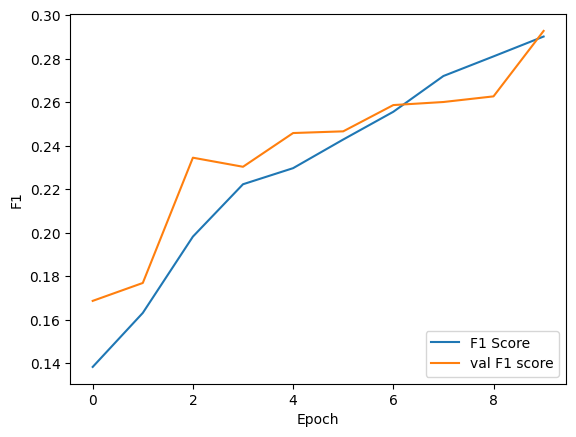

In [ ]:
# Adam Optimizer
plot_f1(history_lenet_adam)
plt.show()

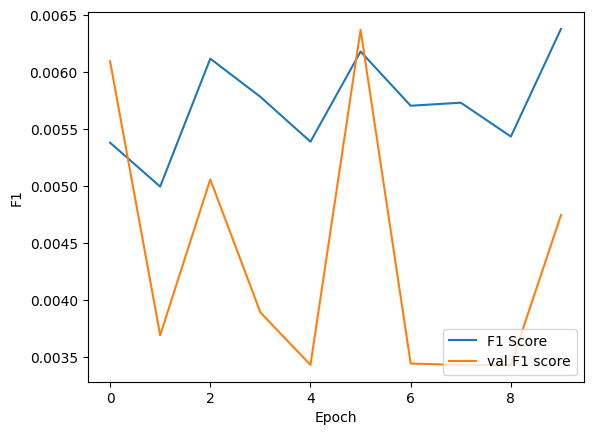

In [ ]:
# SGD Optimizer
plot_f1(history_lenet_sgd)
plt.show()

**AlexNet**

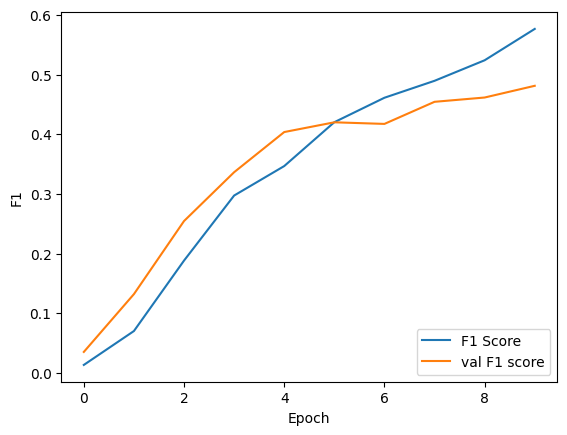

In [ ]:
# Adam Optimizer
plot_f1(history_alexnet_adam)
plt.show()

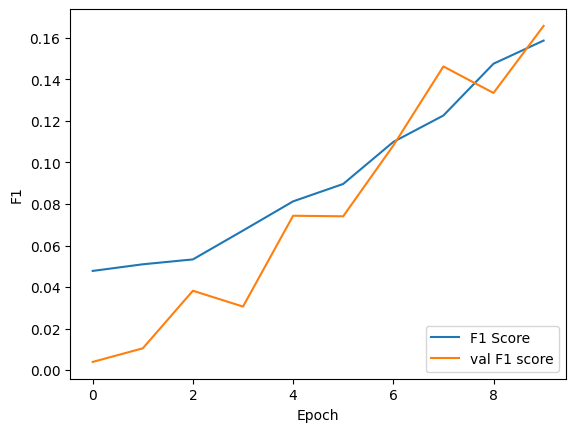

In [ ]:
# SGD Optimizer
plot_f1(history_alexnet_sgd)
plt.show()

**VGG**

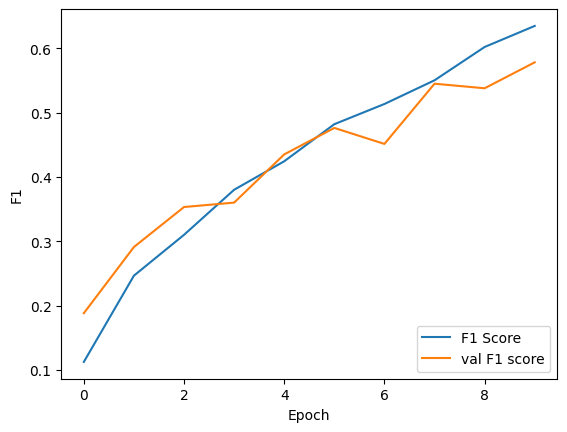

In [ ]:
# Adam Optimizer
plot_f1(history_vgg_adam)
plt.show()

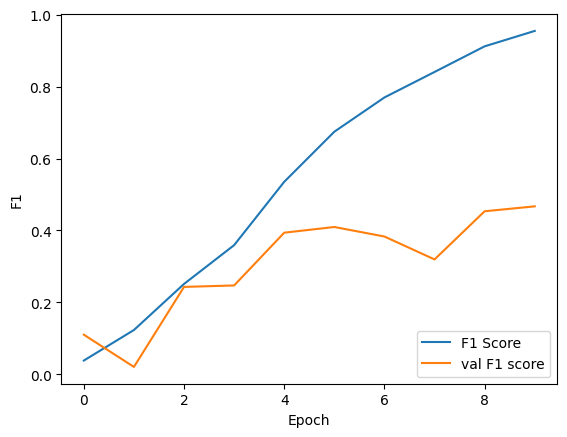

In [ ]:
# SGD Optimizer
plot_f1(history_vgg_sgd)
plt.show()

**MyCNN**

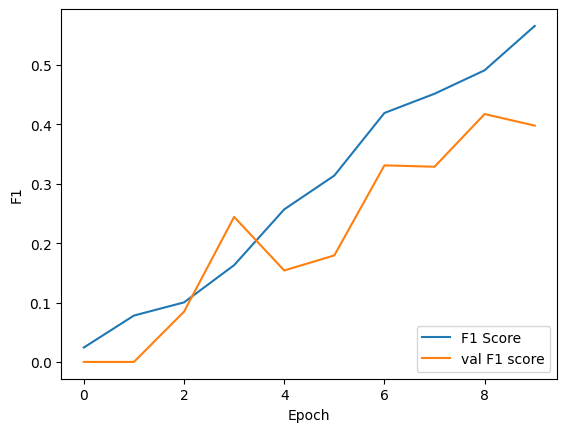

In [ ]:
# Adam Optimizer
plot_f1(history_mycnn_adam)
plt.show()

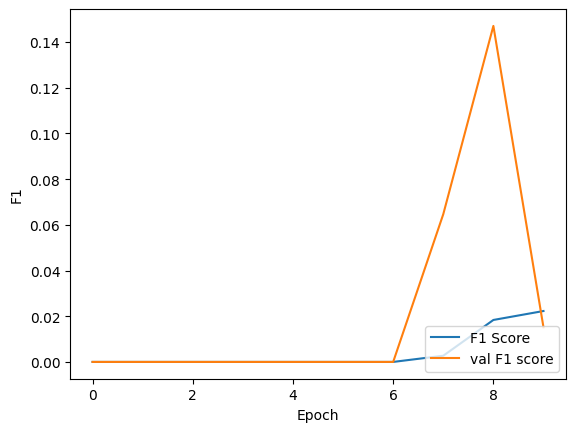

In [ ]:
# SGD Optimizer
plot_f1(history_mycnn_sgd)
plt.show()

Από τις παραπάνω γραφικές βλέπουμε ότι τα καλύτερα αποτελέσματα τα πετυχαίνουμε με τον adam oprimizer. Επίσης σύμφωνα με το F1 Score στο validation set καλύτερο μοντέλο φαίνεται να είναι το VGG με χρήση του adam

**Βήμα 3**

**LeNet**

In [ ]:
LeNet_adam.evaluate(x_test, y_test)

63/63 [==============================] - 48s 754ms/step - loss: 2.2159 - f1_score_metric: 0.3030


[2.215864896774292, 0.30298352241516113]

In [ ]:
LeNet_sgd.evaluate(x_test, y_test)

63/63 [==============================] - 47s 752ms/step - loss: 2.9960 - f1_score_metric: 0.0081


[2.9959816932678223, 0.008102195337414742]

**AlexNet**

In [ ]:
AlexNet_adam.evaluate(x_test, y_test)

63/63 [==============================] - 48s 753ms/step - loss: 1.6417 - f1_score_metric: 0.4920


[1.6417454481124878, 0.49203523993492126]

In [ ]:
AlexNet_sgd.evaluate(x_test, y_test)

63/63 [==============================] - 51s 815ms/step - loss: 2.5729 - f1_score_metric: 0.1866


[2.5729260444641113, 0.18663781881332397]

**VGG**

In [ ]:
VGG_adam.evaluate(x_test, y_test)

63/63 [==============================] - 53s 799ms/step - loss: 1.3822 - f1_score_metric: 0.5840


[1.3822499513626099, 0.5839952826499939]

In [ ]:
VGG_sgd.evaluate(x_test, y_test)

63/63 [==============================] - 1s 14ms/step - loss: 1.6805 - f1_score_metric: 0.3366


[1.6805000305175781, 0.3365834951400757]

**MyCNN**

In [ ]:
myCNN_adam.evaluate(x_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 1.5112 - f1_score_metric: 0.2848


[1.5111796855926514, 0.2848324477672577]

In [ ]:
myCNN_sgd.evaluate(x_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 2.6001 - f1_score_metric: 0.0291


[2.6001250743865967, 0.029100531712174416]

Τα συμπεράσματα και πάλι είναι παρόμοια με αυτά του βήματος 2. Ο adam optimizer είναι καλύτερος από τον sgd και το καλύτερο μοντέλο σύμφωνα με το F1 score στο test set φαίνεται να είναι το VGG με adam


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), ώστε το μοντέλο σας να γενικεύει καλύτερα, όπως:

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator))

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου

---


**Βήμα 1**

**Dropout**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

input_shape = (32, 32, 3)

myCNN_dropout = models.Sequential()

myCNN_dropout.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
myCNN_dropout.add(layers.MaxPooling2D((2, 2)))
myCNN_dropout.add(layers.Dropout(0.25))  # Dropout after the first convolutional layer

myCNN_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
myCNN_dropout.add(layers.MaxPooling2D((2, 2)))
myCNN_dropout.add(layers.Dropout(0.25))  # Dropout after the second convolutional layer

myCNN_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))

myCNN_dropout.add(layers.Flatten())

myCNN_dropout.add(layers.Dense(512, activation='relu'))
myCNN_dropout.add(layers.Dropout(0.5))  # Dropout after the first dense layer
myCNN_dropout.add(layers.Dense(128, activation='relu'))
myCNN_dropout.add(layers.Dropout(0.5))  # Dropout after the second dense layer

myCNN_dropout.add(layers.Dense(20, activation='softmax'))

myCNN_dropout.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric])

myCNN_dropout.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_110 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "myCNN_dropout.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_mycnn_dropout = myCNN_dropout.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
myCNN_dropout.save('/content/drive/My Drive/CNNs/myCNN_dropout.h5')

Epoch 1/30
67/67 [==============================] - 5s 18ms/step - loss: 2.9346 - f1_score_metric: 0.0172 - val_loss: 2.8158 - val_f1_score_metric: 0.0000e+00
Epoch 2/30
67/67 [==============================] - 1s 12ms/step - loss: 2.7190 - f1_score_metric: 0.0381 - val_loss: 2.4731 - val_f1_score_metric: 0.0000e+00
Epoch 3/30
67/67 [==============================] - 1s 12ms/step - loss: 2.5081 - f1_score_metric: 0.0410 - val_loss: 2.3353 - val_f1_score_metric: 0.0000e+00
Epoch 4/30
67/67 [==============================] - 1s 11ms/step - loss: 2.3398 - f1_score_metric: 0.0572 - val_loss: 2.1303 - val_f1_score_metric: 0.0000e+00
Epoch 5/30
67/67 [==============================] - 1s 11ms/step - loss: 2.1863 - f1_score_metric: 0.0493 - val_loss: 2.0476 - val_f1_score_metric: 0.0405
Epoch 6/30
67/67 [==============================] - 1s 11ms/step - loss: 2.0665 - f1_score_metric: 0.0839 - val_loss: 1.9591 - val_f1_score_metric: 0.0000e+00
Epoch 7/30
67/67 [==============================] 

**Data Augmentation**

In [ ]:
# Define image dimensions
img_height = 32
img_width = 32

# Define data augmentation
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Combine data augmentation with model training
myCNN_adam_with_augmentation = models.Sequential([
    data_augmentation,
    myCNN_adam
])

# Compile the model
myCNN_adam_with_augmentation.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric])

# Train the model
history_myCNN_adam_with_augmentation = myCNN_adam_with_augmentation.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/30
67/67 [==============================] - 5s 20ms/step - loss: 1.0182 - f1_score_metric: 0.5387 - val_loss: 1.4033 - val_f1_score_metric: 0.3310
Epoch 2/30
67/67 [==============================] - 1s 15ms/step - loss: 0.9370 - f1_score_metric: 0.6628 - val_loss: 1.3837 - val_f1_score_metric: 0.4100
Epoch 3/30
67/67 [==============================] - 1s 14ms/step - loss: 0.9135 - f1_score_metric: 0.5734 - val_loss: 1.4611 - val_f1_score_metric: 0.3443
Epoch 4/30
67/67 [==============================] - 1s 14ms/step - loss: 0.8582 - f1_score_metric: 0.6549 - val_loss: 1.4628 - val_f1_score_metric: 0.3443
Epoch 5/30
67/67 [==============================] - 1s 13ms/step - loss: 0.8546 - f1_score_metric: 0.6455 - val_loss: 1.4240 - val_f1_score_metric: 0.4682
Epoch 6/30
67/67 [==============================] - 1s 18ms/step - loss: 0.8046 - f1_score_metric: 0.6960 - val_loss: 1.4351 - val_f1_score_metric: 0.3977
Epoch 7/30
67/67 [==============================] - 1s 21ms/step - los

**Βήμα 2**

**Dropout**

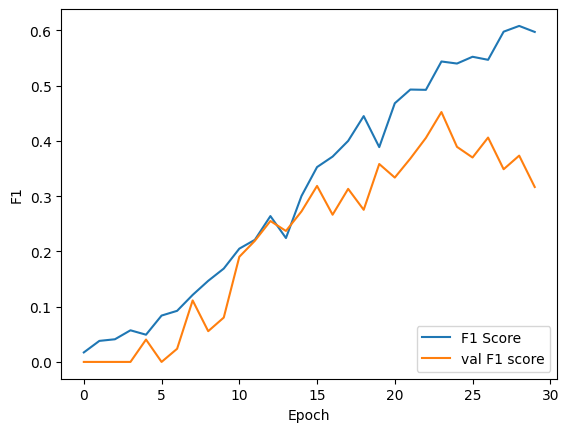

In [ ]:
plot_f1(history_mycnn_dropout)
plt.show()

In [ ]:
myCNN_dropout.evaluate(x_test, y_test)

63/63 [==============================] - 0s 7ms/step - loss: 1.4270 - f1_score_metric: 0.3165


[1.4270390272140503, 0.3164776861667633]

**Data Augmentation**

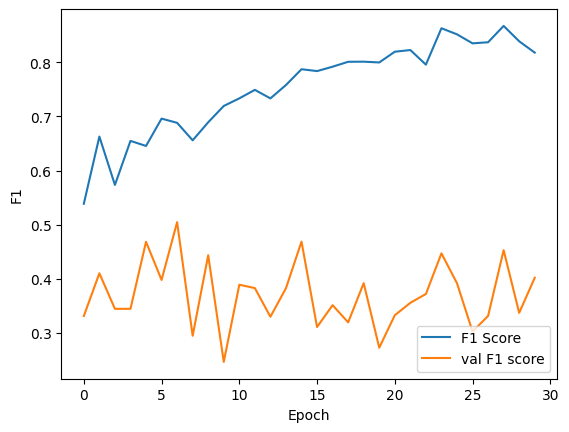

In [ ]:
plot_f1(history_myCNN_adam_with_augmentation)
plt.show()

In [ ]:
myCNN_adam_with_augmentation.evaluate(x_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 2.0917 - f1_score_metric: 0.2706


[2.0917186737060547, 0.2706349492073059]

Σύμφωνα με τα παραπάνω αποτελέσματα φαίνεται το μοντέλο με το Dropout έχει καλύτερη επίδοση από το μοντέλο που χρησιμοποιήθηκε Data augmentation

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς το F1 score στην αντιμετώπιση της υπερεκπαίδεσης.

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

α. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

β. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

---
### Βήμα 2: Αξιολόγηση

Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου.

---

**Βήμα 1**

**VGG 1α**

In [ ]:
from tensorflow.keras.applications import VGG19, EfficientNetB0

input_shape = (32,32,3)
# Load VGG19 with pre-trained weights, excluding the top classification layer
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base
vgg_base.trainable = False

# Create a classification head for VGG19
vgg_model1 = models.Sequential()
vgg_model1.add(vgg_base)
vgg_model1.add(layers.Flatten())
vgg_model1.add(layers.Dense(512, activation='relu'))
vgg_model1.add(layers.Dropout(0.5))
vgg_model1.add(layers.Dense(128, activation='relu'))
vgg_model1.add(layers.Dropout(0.5))
vgg_model1.add(layers.Dense(20, activation='softmax'))

# Compile the model
vgg_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score_metric])

# Summary of VGG19 model
vgg_model1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_15 (Flatten)        (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 512)               262656    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               65664     
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 20)              

In [ ]:
# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "vgg_model1.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_vgg_model1 =vgg_model1.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
vgg_model1.save('/content/drive/My Drive/CNNs/vgg_model1.h5')

Epoch 1/30
67/67 [==============================] - 3s 21ms/step - loss: 2.5796 - f1_score_metric: 0.2192 - val_loss: 1.9082 - val_f1_score_metric: 0.4893
Epoch 2/30
67/67 [==============================] - 1s 17ms/step - loss: 2.0241 - f1_score_metric: 0.4015 - val_loss: 1.6578 - val_f1_score_metric: 0.5283
Epoch 3/30
67/67 [==============================] - 1s 16ms/step - loss: 1.8302 - f1_score_metric: 0.4294 - val_loss: 1.5643 - val_f1_score_metric: 0.5260
Epoch 4/30
67/67 [==============================] - 1s 15ms/step - loss: 1.7208 - f1_score_metric: 0.4984 - val_loss: 1.4905 - val_f1_score_metric: 0.5483
Epoch 5/30
67/67 [==============================] - 1s 15ms/step - loss: 1.6462 - f1_score_metric: 0.4944 - val_loss: 1.4434 - val_f1_score_metric: 0.5695
Epoch 6/30
67/67 [==============================] - 1s 15ms/step - loss: 1.5805 - f1_score_metric: 0.4846 - val_loss: 1.4229 - val_f1_score_metric: 0.5908
Epoch 7/30
67/67 [==============================] - 1s 16ms/step - los

**EfficientNetB0 1α**

In [ ]:
# Load EfficientNetB0 with pre-trained weights, excluding the top classification layer
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze the convolutional base
efficientnet_base.trainable = False

# Create a classification head for EfficientNetB0
efficientnet_model1 = models.Sequential()
efficientnet_model1.add(efficientnet_base)
efficientnet_model1.add(layers.Flatten())
efficientnet_model1.add(layers.Dense(512, activation='relu'))
efficientnet_model1.add(layers.Dropout(0.5))
efficientnet_model1.add(layers.Dense(128, activation='relu'))
efficientnet_model1.add(layers.Dropout(0.5))
efficientnet_model1.add(layers.Dense(20, activation='softmax'))

# Compile the model
efficientnet_model1.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=[f1_score_metric])

# Summary of EfficientNetB0 model
efficientnet_model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1, 1, 1280)        4049571   
 )                                                               
                                                                 
 flatten_9 (Flatten)         (None, 1280)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               655872    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               65664     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                     

In [ ]:
# Define a checkpoint callback with custom file name
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath = "efficientnet_model1.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_efficientnet_model1 = efficientnet_model1.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
efficientnet_model1.save('/content/drive/My Drive/CNNs/efficientnet_model1.h5')

Epoch 1/30
67/67 [==============================] - 12s 47ms/step - loss: 3.0309 - f1_score_metric: 0.0313 - val_loss: 2.9967 - val_f1_score_metric: 0.0000e+00
Epoch 2/30
67/67 [==============================] - 1s 20ms/step - loss: 3.0024 - f1_score_metric: 0.0589 - val_loss: 2.9970 - val_f1_score_metric: 0.0000e+00
Epoch 3/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9978 - f1_score_metric: 0.0069 - val_loss: 2.9962 - val_f1_score_metric: 0.0000e+00
Epoch 4/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9959 - f1_score_metric: 0.0000e+00 - val_loss: 2.9966 - val_f1_score_metric: 0.0000e+00
Epoch 5/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9958 - f1_score_metric: 0.0000e+00 - val_loss: 2.9966 - val_f1_score_metric: 0.0000e+00
Epoch 6/30
67/67 [==============================] - 2s 25ms/step - loss: 2.9958 - f1_score_metric: 0.0000e+00 - val_loss: 2.9969 - val_f1_score_metric: 0.0000e+00
Epoch 7/30
67/67 [===============

Το μηδενικό f1 score δείχνει ότι μπορεί να έχουμε κάποιο λάθος στον κώδικα

**VGG 1β**

In [ ]:
# Create a classification head for VGG19
vgg_model2 = models.Sequential()
vgg_model2.add(vgg_base)
vgg_model2.add(layers.Flatten())
vgg_model2.add(layers.Dense(512, activation='relu'))
vgg_model2.add(layers.Dropout(0.5))
vgg_model2.add(layers.Dense(128, activation='relu', trainable = False))
vgg_model2.add(layers.Dropout(0.5))
vgg_model2.add(layers.Dense(20, activation='softmax'))


vgg_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score_metric])

# Summary of VGG19 model after setting trainable flags
vgg_model2.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_13 (Flatten)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 512)               262656    
                                                                 
 dropout_29 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 128)               65664     
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 20)              

In [ ]:
w  = vgg_model1.layers[-3].get_weights()
vgg_model2.layers[-3].set_weights(w)

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "vgg_model2.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_vgg_model2 =vgg_model2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
vgg_model2.save('/content/drive/My Drive/CNNs/vgg_model2.h5')

Epoch 1/30
65/67 [============================>.] - ETA: 0s - loss: 2.6220 - f1_score_metric: 0.2410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 3s 22ms/step - loss: 2.6098 - f1_score_metric: 0.2481 - val_loss: 1.9454 - val_f1_score_metric: 0.4225
Epoch 2/30
67/67 [==============================] - 1s 16ms/step - loss: 2.0274 - f1_score_metric: 0.4229 - val_loss: 1.6627 - val_f1_score_metric: 0.5002
Epoch 3/30
67/67 [==============================] - 1s 15ms/step - loss: 1.8292 - f1_score_metric: 0.4094 - val_loss: 1.5586 - val_f1_score_metric: 0.4584
Epoch 4/30
67/67 [==============================] - 1s 18ms/step - loss: 1.7182 - f1_score_metric: 0.4377 - val_loss: 1.4975 - val_f1_score_metric: 0.5346
Epoch 5/30
67/67 [==============================] - 1s 19ms/step - loss: 1.6535 - f1_score_metric: 0.4326 - val_loss: 1.4521 - val_f1_score_metric: 0.5351
Epoch 6/30
67/67 [==============================] - 1s 20ms/step - loss: 1.5821 - f1_score_metric: 0.4820 - val_loss: 1.4118 - val_f1_score_metric: 0.5549
Epoch 7/30
67/67 [==============================] - 1s 18ms/step - loss: 1.5468 -

**EfficientNetB0 1β**

In [ ]:
# Create a classification head for EfficientNetB0
efficientnet_model2 = models.Sequential()
efficientnet_model2.add(efficientnet_base)
efficientnet_model2.add(layers.Flatten())
efficientnet_model2.add(layers.Dense(512, activation='relu'))
efficientnet_model2.add(layers.Dropout(0.5))
efficientnet_model2.add(layers.Dense(128, activation='relu',trainable = False))
efficientnet_model2.add(layers.Dropout(0.5))
efficientnet_model2.add(layers.Dense(20, activation='softmax'))



# Compile the model
efficientnet_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_score_metric])

# Summary of EfficientNetB0 model after setting trainable flags
efficientnet_model2.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1, 1, 1280)        4049571   
 )                                                               
                                                                 
 flatten_14 (Flatten)        (None, 1280)              0         
                                                                 
 dense_47 (Dense)            (None, 512)               655872    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               65664     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                     

In [ ]:
w  = efficientnet_model1.layers[-3].get_weights()
efficientnet_model2.layers[-3].set_weights(w)

# Define a checkpoint callback with custom file name
checkpoint_callback = ModelCheckpoint(filepath = "efficientnet_model2.h5", save_freq='epoch')

# Train the model with the checkpoint callback
history_efficientnet_model2 = efficientnet_model2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])
efficientnet_model2.save('/content/drive/My Drive/CNNs/efficientnet_model2.h5')

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 2.9956 - f1_score_metric: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 2s 30ms/step - loss: 2.9956 - f1_score_metric: 0.0000e+00 - val_loss: 2.9982 - val_f1_score_metric: 0.0000e+00
Epoch 2/30
67/67 [==============================] - 2s 24ms/step - loss: 2.9957 - f1_score_metric: 0.0000e+00 - val_loss: 2.9981 - val_f1_score_metric: 0.0000e+00
Epoch 3/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9956 - f1_score_metric: 0.0000e+00 - val_loss: 2.9982 - val_f1_score_metric: 0.0000e+00
Epoch 4/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9957 - f1_score_metric: 0.0000e+00 - val_loss: 2.9981 - val_f1_score_metric: 0.0000e+00
Epoch 5/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9957 - f1_score_metric: 0.0000e+00 - val_loss: 2.9981 - val_f1_score_metric: 0.0000e+00
Epoch 6/30
67/67 [==============================] - 1s 20ms/step - loss: 2.9957 - f1_score_metric: 0.0000e+00 - val_loss: 2.9981 - val_f1_score_metric: 0.0000e+00
Epoch 7/30
67/67 [===============

Το μηδενικό f1 score δείχνει ότι μπορεί να έχουμε κάποιο λάθος στον κώδικα

**Βήμα 2**

**VGG 1α**

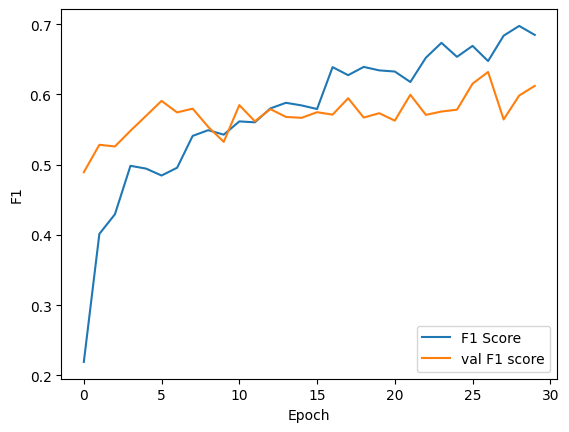

In [ ]:
plot_f1(history_vgg_model1)
plt.show()

In [ ]:
vgg_model1.evaluate(x_test, y_test)

63/63 [==============================] - 0s 7ms/step - loss: 1.2760 - f1_score_metric: 0.4568


[1.2760261297225952, 0.4567648470401764]

**VGG 1β**

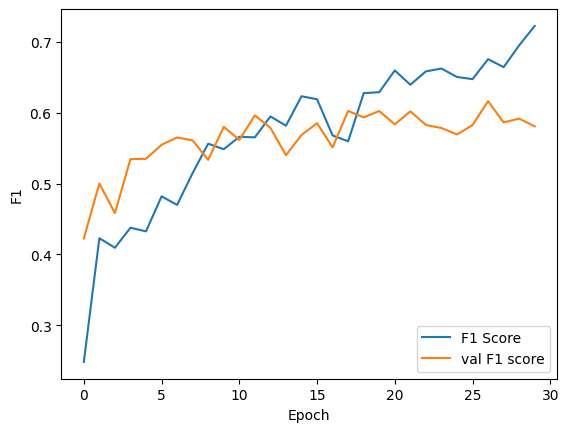

In [ ]:
plot_f1(history_vgg_model2)
plt.show()

In [ ]:
vgg_model2.evaluate(x_test, y_test)

63/63 [==============================] - 1s 8ms/step - loss: 1.3006 - f1_score_metric: 0.4673


[1.3005720376968384, 0.4673469066619873]

**EfficientNetB0 1α**

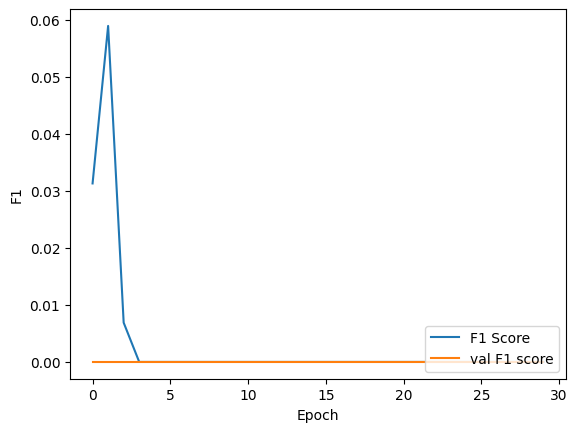

In [ ]:
plot_f1(history_efficientnet_model1)
plt.show()

In [ ]:
efficientnet_model1.evaluate(x_test, y_test)

63/63 [==============================] - 1s 11ms/step - loss: 2.9959 - f1_score_metric: 0.0000e+00


[2.9959194660186768, 0.0]

**EfficientNetB0 1β**

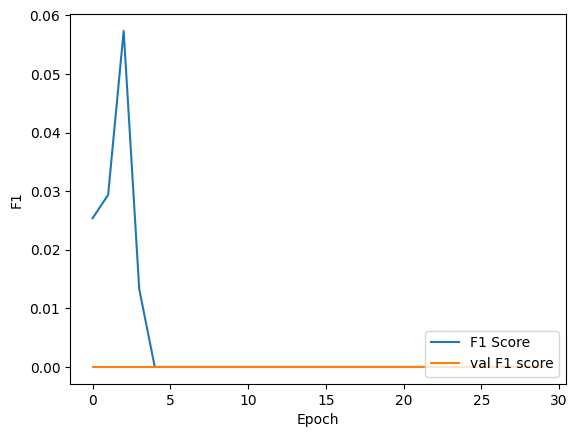

In [ ]:
plot_f1(history_efficientnet_model2)
plt.show()

In [ ]:
efficientnet_model2.evaluate(x_test, y_test)

63/63 [==============================] - 1s 11ms/step - loss: 2.9959 - f1_score_metric: 0.0000e+00


[2.9959218502044678, 0.0]

Παρατηρούμε ότι το καλύτερο μοντέλο (με βάση το f1 score στο test set) το έχουμε  στο VGG19 στο ερώτημα 1β όπου κάνουμε train μόνο κάποια βάρη στην έξοδο του δικτύου




Τα score στο EfficientNetB0 είναι όλα μηδενικά εκτός από τις πρώτες εποχές. Αυτό δεν είναι φυσιολογικό όπότε μπορεί να υπάρχει κάποιο λάθος στην υλοποίηση



## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
